##   Author:  Niall Mullane
###     PID:  99S380224
##   Class:  PH412, Spring, 2018                                          
###     Helpers:  Meekhel Patel

##  Program:  CMS Muons                                     
###     Due Date:  April 2, 2019                                               
###     Language:  Python 3                 
###     IDE:  Jupyter     

##  Purpose:  Plotting real sediment data        
##   "Bugs":  No major problems  


**How to save this notebook to your personal Drive**

To copy this notebook to your Google Drive, go to File and select "Save a copy in Drive", where it will automatically open the copy in a new tab for you to work in. This notebook will be saved into a folder on your personal Drive called "Colab Notebooks".


Still stumped? Check out <a href="https://www.youtube.com/watch?v=qaJ2UpMPXKk"> this video</a> for help




# Relativistic kinematics

<h3>Learning goals</h3>
<ul>
    <li>Relativistic kinematics.
    <li>Standard model particles.
</ul>

<b>Background</b>

If you know the mass of a particle, most of the time you know <i>what that particle is</i>. However, there is no way to just build a single detector that gives you the mass. You need to be clever and make use of Special relativity, specifically <a href="http://en.wikipedia.org/wiki/Relativistic_mechanics">relativistic kinematics</a>.

To determine the mass ($m$) of a particle you need to know the 4-momenta of the particles ($\mathbf{P}$) that are detected after the collision: the energy ($E$), the momentum in the x direction ($p_x$), the momentum in the y direction ($p_y$), the momentum in the z direction ($p_z$).

$$\mathbf{P} = (E,p_x,p_y,p_z)$$


\begin{equation*} m = \sqrt{E^2-(p_x^2+p_y^2 + p_z^2)} \end{equation*}


<b>Let's code!</b>

Here is some sample code that reads in data from a small sample file from the <a href = "http://cms.cern/">CMS experiment</a>. It loops over data from many different proton-proton collisions. 

If you haven't already, you will want to go through the [Data Interfacing](https://colab.research.google.com/drive/1wMs8ffF8KjQhulL90_fCCVIZT5Q4e9x5) exercise so you know how to pull out the relevant information. 

For each collision, you can get the 4-momenta of the jets, muons, electrons, and photons produced in these collisions. 



<h2><font color="red">Challenge!</font></h2>

Copy this sample code and use it to calculate the mass of the muons. Make a histogram of this quantity. 

<i>Hint!</i>

Make sure you do this for all the muons! Each collision can produce differing numbers of muons, so take care when you code this up.

In [6]:
###### This cell need only be run once per session ##############
###### Make sure your runtime type is Python 3 #########
import platform
print(platform.python_version())

# Import h5hep from Github. This is to allow us to read these
# particular files. 
!git  clone https://github.com/mattbellis/h5hep.git

# Import custom tools package from Github. These are some simple accessor functions
# to make it easier to work with these data files. 
!if [ ! -e particle_physics_simplified ]; then git  clone https://github.com/mattbellis/particle_physics_simplified.git; fi
!cd particle_physics_simplified; git pull; python setup.py install --user

# Note that the -q option in the above "python setup.py ..." commands suppresses
# diagnostic output. So if you are having issues, you may want to remove the -q

import pps_tools as pps
import h5hep

3.5.2
fatal: destination path 'h5hep' already exists and is not an empty directory.
Already up-to-date.
running install
running bdist_egg
running egg_info
writing requirements to particle_physics_simplified.egg-info/requires.txt
writing particle_physics_simplified.egg-info/PKG-INFO
writing top-level names to particle_physics_simplified.egg-info/top_level.txt
writing dependency_links to particle_physics_simplified.egg-info/dependency_links.txt
reading manifest file 'particle_physics_simplified.egg-info/SOURCES.txt'
writing manifest file 'particle_physics_simplified.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pps_tools
copying build/lib.linux-x86_64-2.7/pps_tools/test_babar.py -> build/bdist.linux-x86_64/egg/pps_tools
copying build/lib.linux-x86_64-2.7/pps_tools/__init__.py -> build/bdist.linux-x86_64/egg/pps_tools
copying build/lib.linux-x86_

In [2]:
##

!pip3 install git+https://github.com/mattbellis/h5hep.git --user --upgrade
!pip3 install git+https://github.com/mattbellis/particle_physics_simplified.git --user --upgrade

import h5hep
import pps_tools as pps

  Cloning https://github.com/mattbellis/h5hep.git to /tmp/pip-req-build-9t21x3ig
  Running setup.py bdist_wheel for h5hep ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-j0j8o479/wheels/1b/5b/88/a70717ae86e789eccefe91a5f3d068353d7dd93a372da84014
Successfully built h5hep
  Found existing installation: h5hep 0.9
    Uninstalling h5hep-0.9:
      Successfully uninstalled h5hep-0.9
You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Cloning https://github.com/mattbellis/particle_physics_simplified.git to /tmp/pip-req-build-3hme131q
  Running setup.py bdist_wheel for particle-physics-simplified ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_0tcyvw/wheels/1a/aa/e5/a3256c3dc3cbdff623e6512edecdf9d8e7f6139f4db50797eb
Successfully built particle-physics-simplified
  Found existing installation: particle-physics-simplified 0.9
    Uninstalling particle-physics-simplified-0.9:
   

In [4]:
import pps_tools as pps
import h5hep
###### This cell need only be run once per session ############################

# Fetch data file
pps.download_from_drive('dimuons_1000_collisions.hdf5')



Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0


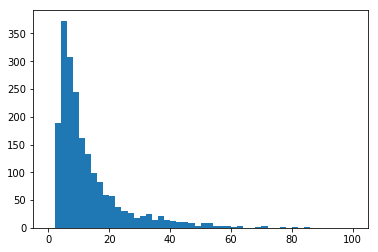

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

infile = 'data/dimuons_1000_collisions.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)
energies = np.array((0))
momentums = np.array((0))

for i in collisions:
    muons = i['muons']
    for muon in muons:
        energies = np.append(energies, muon['e'])
        momentums = np.append(momentums, sqrt(muon['px']**2+muon['py']**2++muon['pz']**2))

masses = (np.power(momentums, 2)/2)
#print(energies)
plt.hist(energies,bins=50,range=(0,100))
plt.show()

Your histogram should look something like the following sketch, though the peak will be at different values. 

The value of the peak, should be the mass of the particle <a href="http://en.wikipedia.org/wiki/Muon">Check your answer!</a> 

You should also make histograms of the energy and magnitude of momentum ($|p|$). You should see a pretty wide range of values for these, and yet the mass is a very specific number.

<b>NOTE: If you are getting an error saying that there is no module "pps_tools", go to Runtime, and then select Restart runtime. Also make sure that your runtime type is Python 3.</b>

In [4]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/particle-physics-playground/playground/master/activities/images/muons_sketch.jpeg')

Suppose we didn't know anything about special relativity and we tried calculating the mass from what we know about classical physics. 

$$KE = \frac{1}{2}mv^2 \qquad KE = \frac{p^2}{2m} \qquad m = \frac{p^2}{2KE}$$

Let's interpret the energy from the CMS data as the kinetic energy ($KE$). Use classical mechanics then to calculate the mass of the muon, given the energy/KE and the momentum. What does <b>that</b> histogram look like?

*Your histogram should not look like the last one! We know that the Classical description of kinematics is not accurate for particle moving at high energies, so don't worry if the two histograms are different. That's the point!  :)*


Building a simplified interface to the events...

Building the indices...
Built the indices!
Data is read in and input file is closed.
Reading in event  0


/home/niallmullane/.local/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in float_power


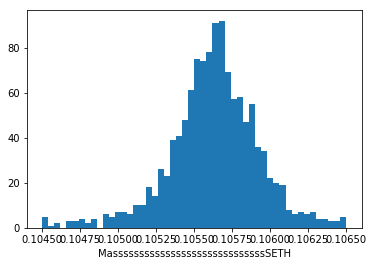

/home/niallmullane/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


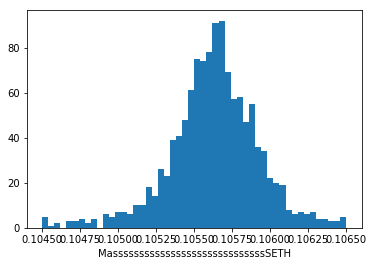

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

infile = 'data/dimuons_1000_collisions.hdf5'
collisions = pps.get_collisions(infile,experiment='CMS',verbose=False)
energies = np.array((0))
momentums = np.array((0))

for i in collisions:
    muons = i['muons']
    for muon in muons:
        energies = np.append(energies, muon['e'])
        momentums = np.append(momentums, sqrt(muon['px']**2+muon['py']**2++muon['pz']**2))


masses = np.float_power(np.power(energies, 2) - np.power(momentums,2), 0.5)
#print(energies)
plt.hist(masses,bins=50,range=(0.1045,0.1065))
plt.xlabel("MasssssssssssssssssssssssssssssSETH")
plt.show()
masses_classical = np.power(momentums, 2)/2/energies
plt.hist(masses,bins=50,range=(0.1045,0.1065))
plt.xlabel("MasssssssssssssssssssssssssssssSETH")
plt.show()